In [3]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [4]:
df = pd.read_csv('diabetes.csv', na_values=['#NAME?'])

In [5]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,2,1
1,85,66,29,0,26.6,0.351,1,0
2,183,64,0,0,23.3,0.672,5,1
3,89,66,23,94,28.1,0.167,4,0
4,137,40,35,168,43.1,2.288,3,1


In [6]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
print('shape:',df.shape)

shape: (768, 8)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [9]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,5.098958,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,2.631788,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,1.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,3.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,5.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,7.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,9.000000,1.000000


In [11]:
df[df.duplicated()].sum()

Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
pp.ProfileReport(df)

Number of variables,8
Number of observations,768
Total Missing (%),0.0%
Total size in memory,48.1 KiB
Average record size in memory,64.1 B
Numeric,7
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [12]:
df.nunique()

Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                           9
Outcome                       2
dtype: int64

In [13]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [14]:
glucose_indices, glucose_values = find_outliers_tukey(df['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))


print("Outliers for BloodPressure")
bp_indices, bp_values = find_outliers_tukey(df['BloodPressure'])
print(np.sort(bp_values))


print("Outliers for SkinThickness")
st_indices, st_values = find_outliers_tukey(df['SkinThickness'])
print(np.sort(st_values))

print("Outliers for Insulin")
in_indices, in_values = find_outliers_tukey(df['Insulin'])
print(np.sort(in_values))

print("Outliers for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df['BMI'])
print(np.sort(bmi_values))

print("Outliers for DiabetesPedigreeFunction")
dpf_indices, dpf_values = find_outliers_tukey(df['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

print("Outliers for Age")
age_indices, age_values = find_outliers_tukey(df['Age'])
print(np.sort(age_values))

Outliers for Glucose
[0 0 0 0 0]
Outliers for BloodPressure
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24
  30  30 108 108 110 110 110 114 122]
Outliers for SkinThickness
[99]
Outliers for Insulin
[321 325 325 325 326 328 330 335 342 360 370 375 387 392 402 415 440 465
 474 478 480 480 485 495 495 510 540 543 545 579 600 680 744 846]
Outliers for BMI
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  52.3 52.3 52.9
 53.2 55.  57.3 59.4 67.1]
Outliers for DiabetesPedigreeFunction
[1.213 1.222 1.224 1.224 1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.353
 1.39  1.391 1.394 1.4   1.441 1.461 1.476 1.6   1.698 1.699 1.731 1.781
 1.893 2.137 2.288 2.329 2.42 ]
Outliers for Age
[]


In [15]:
#df = df.drop(bp_indices)
#min_in = np.min(df_del['Insulin'])
#df_del['Insulin'] = np.where(df_del['Insulin'] > 321, min_in, df_del['Insulin'])

In [16]:
df.shape
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [17]:
X = df[l_column[0:len_feature-1]]
Y = df[l_column[len_feature-1]]
X.shape
Y.shape

(768,)

In [18]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,2
1,85,66,29,0,26.6,0.351,1
2,183,64,0,0,23.3,0.672,5
3,89,66,23,94,28.1,0.167,4
4,137,40,35,168,43.1,2.288,3


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",Y_train.shape)
print("Test variable set size:",Y_test.shape)

Training feature set size: (537, 7)
Test feature set size: (231, 7)
Training variable set size: (537,)
Test variable set size: (231,)


In [20]:
#df_ln['Credit_History'].value_counts()
#values=df_ln['Loan_Status']
#label_encoder=LabelEncoder()
#integer_encoded_1=label_encoder.fit_transform(values)
#integer_encoded_1
#.to_csv("predicted_outcome.csv",index=False)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

In [22]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [23]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.750


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[133  10]
 [ 36  52]]


In [25]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       143
           1       0.84      0.59      0.69        88

    accuracy                           0.80       231
   macro avg       0.81      0.76      0.77       231
weighted avg       0.81      0.80      0.79       231



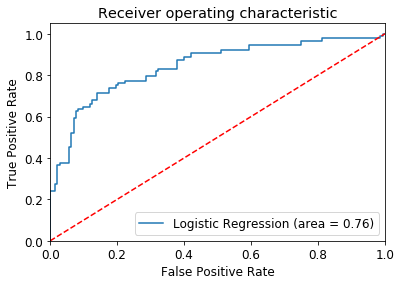

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
logit_roc_auc = roc_auc_score(Y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
ml=RandomForestClassifier()
ml.fit(X_train,Y_train)
y_pred = ml.predict(X_test)

In [29]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(ml.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.724


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[124  19]
 [ 38  50]]


In [32]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(ml.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       143
           1       0.72      0.57      0.64        88

    accuracy                           0.75       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



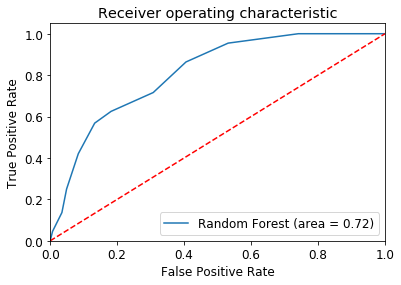

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
logit_roc_auc = roc_auc_score(Y_test, ml.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, ml.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()